# 1. Import and Install Dependencies

In [1]:
!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib

In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [3]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [5]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [6]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [7]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [8]:
len(results.left_hand_landmarks.landmark)

AttributeError: 'NoneType' object has no attribute 'landmark'

In [ ]:
results

In [ ]:
draw_landmarks(frame, results)

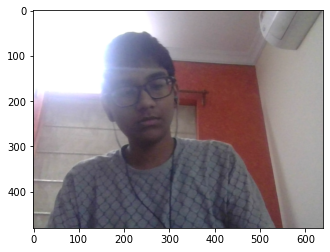

In [9]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [10]:
len(results.left_hand_landmarks.landmark)

AttributeError: 'NoneType' object has no attribute 'landmark'

In [11]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [12]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [13]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() 
    if results.face_landmarks 
    else np.zeros(1404)


IndentationError: unexpected indent (<ipython-input-13-3fe2adb7da0b>, line 2)

In [14]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [15]:
result_test = extract_keypoints(results)

In [16]:
result_test

array([ 0.39366251,  0.42667431, -0.75345361, ...,  0.        ,
        0.        ,  0.        ])

In [17]:
468*3+33*4+21*3+21*3

1662

In [18]:
np.save('0', result_test)

In [19]:
np.load('0.npy')

array([ 0.39366251,  0.42667431, -0.75345361, ...,  0.        ,
        0.        ,  0.        ])

# 4. Setup Folders for Collection

In [20]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('zdata') 

# Actions that we try to detect
actions = np.array(['a', 'b', 'c'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [21]:
# hello
## 0
## 1
## 2
## ...
## 29
# thanks

# I love you

In [22]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [23]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [24]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [30]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [31]:
label_map = {label:num for num, label in enumerate(actions)}

In [32]:
label_map

{'a': 0, 'b': 1, 'c': 2}

In [33]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [34]:
np.array(sequences).shape

(90, 30, 1662)

In [35]:
np.array(labels).shape

(90,)

In [36]:
X = np.array(sequences)

In [37]:
X.shape

(90, 30, 1662)

In [38]:
y = to_categorical(labels).astype(int)

In [39]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [41]:
y_test.shape

(5, 3)

# 7. Build and Train LSTM Neural Network

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [43]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [44]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [45]:
res = [.7, 0.2, 0.1]

In [46]:
actions[np.argmax(res)]

'a'

In [47]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [48]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 6s 381ms/step - loss: 1.1048 - categorical_accuracy: 0.3581
Epoch 2/2000
3/3 [==============================] - 0s 93ms/step - loss: 1.2149 - categorical_accuracy: 0.3366
Epoch 3/2000
3/3 [==============================] - 0s 82ms/step - loss: 1.0479 - categorical_accuracy: 0.4326
Epoch 4/2000
3/3 [==============================] - 0s 91ms/step - loss: 0.9595 - categorical_accuracy: 0.6380
Epoch 5/2000
3/3 [==============================] - 0s 89ms/step - loss: 0.7262 - categorical_accuracy: 0.6380
Epoch 6/2000
3/3 [==============================] - 0s 87ms/step - loss: 0.6569 - categorical_accuracy: 0.6614
Epoch 7/2000
3/3 [==============================] - 0s 88ms/step - loss: 0.5781 - categorical_accuracy: 0.7064
Epoch 8/2000
3/3 [==============================] - 0s 83ms/step - loss: 0.5863 - categorical_accuracy: 0.6712
Epoch 9/2000
3/3 [==============================] - 0s 118ms/step - loss: 0.7186 - categorical_accuracy: 0.6107

3/3 [==============================] - 0s 82ms/step - loss: 0.4642 - categorical_accuracy: 0.6712
Epoch 75/2000
3/3 [==============================] - 0s 82ms/step - loss: 0.4870 - categorical_accuracy: 0.6712
Epoch 76/2000
3/3 [==============================] - 0s 80ms/step - loss: 0.4828 - categorical_accuracy: 0.6751
Epoch 77/2000
3/3 [==============================] - 0s 83ms/step - loss: 0.4798 - categorical_accuracy: 0.6478
Epoch 78/2000
3/3 [==============================] - 0s 82ms/step - loss: 0.4705 - categorical_accuracy: 0.6751
Epoch 79/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.4666 - categorical_accuracy: 0.6751
Epoch 80/2000
3/3 [==============================] - 0s 84ms/step - loss: 0.4672 - categorical_accuracy: 0.6947
Epoch 81/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.5263 - categorical_accuracy: 0.6614
Epoch 82/2000
3/3 [==============================] - 0s 90ms/step - loss: 1.1058 - categorical_accuracy: 0.6105
Epoch 

3/3 [==============================] - 0s 119ms/step - loss: 1.1060 - categorical_accuracy: 0.3347
Epoch 147/2000
3/3 [==============================] - 0s 129ms/step - loss: 1.1026 - categorical_accuracy: 0.3268
Epoch 148/2000
3/3 [==============================] - 0s 151ms/step - loss: 1.1059 - categorical_accuracy: 0.3229
Epoch 149/2000
3/3 [==============================] - 0s 147ms/step - loss: 1.1031 - categorical_accuracy: 0.3386
Epoch 150/2000
3/3 [==============================] - 0s 117ms/step - loss: 1.0961 - categorical_accuracy: 0.3737
Epoch 151/2000
3/3 [==============================] - 0s 133ms/step - loss: 1.1003 - categorical_accuracy: 0.3268
Epoch 152/2000
3/3 [==============================] - 0s 130ms/step - loss: 1.0944 - categorical_accuracy: 0.3464
Epoch 153/2000
3/3 [==============================] - 0s 121ms/step - loss: 1.1023 - categorical_accuracy: 0.3503
Epoch 154/2000
3/3 [==============================] - 0s 122ms/step - loss: 1.0967 - categorical_accura

3/3 [==============================] - 0s 92ms/step - loss: 0.6115 - categorical_accuracy: 0.7945
Epoch 219/2000
3/3 [==============================] - 0s 89ms/step - loss: 0.6065 - categorical_accuracy: 0.7749
Epoch 220/2000
3/3 [==============================] - 0s 84ms/step - loss: 0.5069 - categorical_accuracy: 0.8415
Epoch 221/2000
3/3 [==============================] - 0s 84ms/step - loss: 0.5580 - categorical_accuracy: 0.7691
Epoch 222/2000
3/3 [==============================] - 0s 83ms/step - loss: 1.0886 - categorical_accuracy: 0.8180
Epoch 223/2000
3/3 [==============================] - 0s 111ms/step - loss: 0.7691 - categorical_accuracy: 0.6556
Epoch 224/2000
3/3 [==============================] - 0s 118ms/step - loss: 0.6914 - categorical_accuracy: 0.6966
Epoch 225/2000
3/3 [==============================] - 0s 137ms/step - loss: 0.5666 - categorical_accuracy: 0.8063
Epoch 226/2000
3/3 [==============================] - 0s 142ms/step - loss: 0.6702 - categorical_accuracy: 0

3/3 [==============================] - 0s 87ms/step - loss: 0.7614 - categorical_accuracy: 0.6047
Epoch 291/2000
3/3 [==============================] - 0s 118ms/step - loss: 0.6870 - categorical_accuracy: 0.6321
Epoch 292/2000
3/3 [==============================] - 0s 122ms/step - loss: 0.6411 - categorical_accuracy: 0.6693
Epoch 293/2000
3/3 [==============================] - 0s 103ms/step - loss: 0.5806 - categorical_accuracy: 0.6653
Epoch 294/2000
3/3 [==============================] - 0s 95ms/step - loss: 0.5325 - categorical_accuracy: 0.6771
Epoch 295/2000
3/3 [==============================] - 0s 92ms/step - loss: 0.5243 - categorical_accuracy: 0.6732
Epoch 296/2000
3/3 [==============================] - 0s 92ms/step - loss: 0.5419 - categorical_accuracy: 0.6380
Epoch 297/2000
3/3 [==============================] - 0s 89ms/step - loss: 0.4870 - categorical_accuracy: 0.6771
Epoch 298/2000
3/3 [==============================] - 0s 89ms/step - loss: 0.4434 - categorical_accuracy: 0.

3/3 [==============================] - 0s 108ms/step - loss: 0.1842 - categorical_accuracy: 0.9472
Epoch 363/2000
3/3 [==============================] - 0s 84ms/step - loss: 0.1403 - categorical_accuracy: 0.9941
Epoch 364/2000
3/3 [==============================] - 0s 86ms/step - loss: 0.1187 - categorical_accuracy: 0.9843
Epoch 365/2000
3/3 [==============================] - 0s 106ms/step - loss: 0.1355 - categorical_accuracy: 0.9843
Epoch 366/2000
3/3 [==============================] - 0s 108ms/step - loss: 0.1314 - categorical_accuracy: 0.9648
Epoch 367/2000
3/3 [==============================] - 0s 84ms/step - loss: 0.1309 - categorical_accuracy: 0.9550
Epoch 368/2000
3/3 [==============================] - 0s 90ms/step - loss: 0.1131 - categorical_accuracy: 0.9667
Epoch 369/2000
3/3 [==============================] - 0s 83ms/step - loss: 0.1131 - categorical_accuracy: 0.9511
Epoch 370/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.3379 - categorical_accuracy: 0.

3/3 [==============================] - 0s 119ms/step - loss: 0.1011 - categorical_accuracy: 0.9550
Epoch 435/2000
3/3 [==============================] - 0s 81ms/step - loss: 0.3741 - categorical_accuracy: 0.8552
Epoch 436/2000
3/3 [==============================] - 0s 93ms/step - loss: 0.2396 - categorical_accuracy: 0.8924
Epoch 437/2000
3/3 [==============================] - 0s 92ms/step - loss: 0.0967 - categorical_accuracy: 0.9706
Epoch 438/2000
3/3 [==============================] - 0s 82ms/step - loss: 0.1475 - categorical_accuracy: 0.9315
Epoch 439/2000
3/3 [==============================] - 0s 89ms/step - loss: 0.1336 - categorical_accuracy: 0.9413
Epoch 440/2000
3/3 [==============================] - 0s 82ms/step - loss: 0.0545 - categorical_accuracy: 0.9882
Epoch 441/2000
3/3 [==============================] - 0s 85ms/step - loss: 0.0691 - categorical_accuracy: 0.9765
Epoch 442/2000
3/3 [==============================] - 0s 146ms/step - loss: 0.0787 - categorical_accuracy: 0.9

3/3 [==============================] - 0s 100ms/step - loss: 0.0653 - categorical_accuracy: 0.9941
Epoch 507/2000
3/3 [==============================] - 0s 89ms/step - loss: 0.0590 - categorical_accuracy: 0.9902
Epoch 508/2000
3/3 [==============================] - 0s 106ms/step - loss: 0.0465 - categorical_accuracy: 0.9902
Epoch 509/2000
3/3 [==============================] - 0s 87ms/step - loss: 0.0394 - categorical_accuracy: 0.9941
Epoch 510/2000
3/3 [==============================] - 0s 96ms/step - loss: 0.0358 - categorical_accuracy: 0.9902
Epoch 511/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.0446 - categorical_accuracy: 0.9824
Epoch 512/2000
3/3 [==============================] - 0s 113ms/step - loss: 0.0416 - categorical_accuracy: 0.9824
Epoch 513/2000
3/3 [==============================] - 0s 109ms/step - loss: 0.0285 - categorical_accuracy: 0.9902
Epoch 514/2000
3/3 [==============================] - 0s 122ms/step - loss: 0.0263 - categorical_accuracy: 

Epoch 578/2000
3/3 [==============================] - 0s 103ms/step - loss: 0.0073 - categorical_accuracy: 1.0000
Epoch 579/2000
3/3 [==============================] - 0s 91ms/step - loss: 0.0060 - categorical_accuracy: 1.0000
Epoch 580/2000
3/3 [==============================] - 0s 105ms/step - loss: 0.0049 - categorical_accuracy: 1.0000
Epoch 581/2000
3/3 [==============================] - 0s 102ms/step - loss: 0.0033 - categorical_accuracy: 1.0000
Epoch 582/2000
3/3 [==============================] - 0s 88ms/step - loss: 0.0080 - categorical_accuracy: 1.0000
Epoch 583/2000
3/3 [==============================] - 0s 100ms/step - loss: 0.0027 - categorical_accuracy: 1.0000
Epoch 584/2000
3/3 [==============================] - 0s 95ms/step - loss: 0.0058 - categorical_accuracy: 1.0000
Epoch 585/2000
3/3 [==============================] - 0s 90ms/step - loss: 0.0548 - categorical_accuracy: 0.9902
Epoch 586/2000
3/3 [==============================] - 0s 93ms/step - loss: 0.0647 - categori

3/3 [==============================] - 0s 101ms/step - loss: 3.7330e-04 - categorical_accuracy: 1.0000
Epoch 650/2000
3/3 [==============================] - 0s 95ms/step - loss: 3.5269e-04 - categorical_accuracy: 1.0000
Epoch 651/2000
3/3 [==============================] - 0s 96ms/step - loss: 3.3354e-04 - categorical_accuracy: 1.0000
Epoch 652/2000
3/3 [==============================] - 0s 103ms/step - loss: 4.3615e-04 - categorical_accuracy: 1.0000
Epoch 653/2000
3/3 [==============================] - 0s 106ms/step - loss: 3.9925e-04 - categorical_accuracy: 1.0000
Epoch 654/2000
3/3 [==============================] - 0s 93ms/step - loss: 3.1457e-04 - categorical_accuracy: 1.0000
Epoch 655/2000
3/3 [==============================] - 0s 93ms/step - loss: 2.7017e-04 - categorical_accuracy: 1.0000
Epoch 656/2000
3/3 [==============================] - 0s 96ms/step - loss: 3.7281e-04 - categorical_accuracy: 1.0000
Epoch 657/2000
3/3 [==============================] - 0s 89ms/step - loss: 3

3/3 [==============================] - 0s 100ms/step - loss: 9.9938e-05 - categorical_accuracy: 1.0000
Epoch 720/2000
3/3 [==============================] - 0s 96ms/step - loss: 6.6174e-05 - categorical_accuracy: 1.0000
Epoch 721/2000
3/3 [==============================] - 0s 95ms/step - loss: 8.1854e-05 - categorical_accuracy: 1.0000
Epoch 722/2000
3/3 [==============================] - 0s 97ms/step - loss: 7.2544e-05 - categorical_accuracy: 1.0000
Epoch 723/2000
3/3 [==============================] - 0s 96ms/step - loss: 6.6712e-05 - categorical_accuracy: 1.0000
Epoch 724/2000
3/3 [==============================] - 0s 102ms/step - loss: 5.1547e-05 - categorical_accuracy: 1.0000
Epoch 725/2000
3/3 [==============================] - 0s 111ms/step - loss: 6.3964e-05 - categorical_accuracy: 1.0000
Epoch 726/2000
3/3 [==============================] - 0s 101ms/step - loss: 7.1180e-05 - categorical_accuracy: 1.0000
Epoch 727/2000
3/3 [==============================] - 0s 91ms/step - loss: 

3/3 [==============================] - 0s 110ms/step - loss: 3.0659 - categorical_accuracy: 0.3875
Epoch 791/2000
3/3 [==============================] - 0s 111ms/step - loss: 3.7253 - categorical_accuracy: 0.5635
Epoch 792/2000
3/3 [==============================] - 0s 103ms/step - loss: 11.5886 - categorical_accuracy: 0.1018
Epoch 793/2000
3/3 [==============================] - 0s 98ms/step - loss: 5.5887 - categorical_accuracy: 0.3641
Epoch 794/2000
3/3 [==============================] - 0s 98ms/step - loss: 13.2138 - categorical_accuracy: 0.3170
Epoch 795/2000
3/3 [==============================] - 0s 99ms/step - loss: 6.1416 - categorical_accuracy: 0.3777
Epoch 796/2000
3/3 [==============================] - 0s 99ms/step - loss: 16.4869 - categorical_accuracy: 0.4011
Epoch 797/2000
3/3 [==============================] - 0s 103ms/step - loss: 17.2988 - categorical_accuracy: 0.3190
Epoch 798/2000
3/3 [==============================] - 0s 105ms/step - loss: 13.7963 - categorical_accur

3/3 [==============================] - 0s 112ms/step - loss: 0.2295 - categorical_accuracy: 0.9296
Epoch 863/2000
3/3 [==============================] - 0s 107ms/step - loss: 0.2095 - categorical_accuracy: 0.9706
Epoch 864/2000
3/3 [==============================] - 0s 112ms/step - loss: 0.1876 - categorical_accuracy: 0.9843
Epoch 865/2000
3/3 [==============================] - 0s 108ms/step - loss: 0.7674 - categorical_accuracy: 0.7886
Epoch 866/2000
3/3 [==============================] - 0s 101ms/step - loss: 1.1489 - categorical_accuracy: 0.5322
Epoch 867/2000
3/3 [==============================] - 0s 99ms/step - loss: 2.9554 - categorical_accuracy: 0.3289
Epoch 868/2000
3/3 [==============================] - 0s 99ms/step - loss: 1.8597 - categorical_accuracy: 0.4306
Epoch 869/2000
3/3 [==============================] - 0s 100ms/step - loss: 0.7381 - categorical_accuracy: 0.7006
Epoch 870/2000
3/3 [==============================] - 0s 100ms/step - loss: 1.1765 - categorical_accuracy

3/3 [==============================] - 0s 86ms/step - loss: 0.2132 - categorical_accuracy: 0.9178
Epoch 935/2000
3/3 [==============================] - 0s 88ms/step - loss: 0.2348 - categorical_accuracy: 0.8787
Epoch 936/2000
3/3 [==============================] - 0s 87ms/step - loss: 0.2061 - categorical_accuracy: 0.9021
Epoch 937/2000
3/3 [==============================] - 0s 88ms/step - loss: 0.2706 - categorical_accuracy: 0.8121
Epoch 938/2000
3/3 [==============================] - 0s 89ms/step - loss: 0.2062 - categorical_accuracy: 0.9021
Epoch 939/2000
3/3 [==============================] - 0s 95ms/step - loss: 0.2097 - categorical_accuracy: 0.9217
Epoch 940/2000
3/3 [==============================] - 0s 88ms/step - loss: 0.2173 - categorical_accuracy: 0.9178
Epoch 941/2000
3/3 [==============================] - 0s 84ms/step - loss: 0.2125 - categorical_accuracy: 0.9159
Epoch 942/2000
3/3 [==============================] - 0s 86ms/step - loss: 0.2027 - categorical_accuracy: 0.960

3/3 [==============================] - 0s 105ms/step - loss: 0.2049 - categorical_accuracy: 0.9667
Epoch 1007/2000
3/3 [==============================] - 0s 104ms/step - loss: 0.2279 - categorical_accuracy: 0.9100
Epoch 1008/2000
3/3 [==============================] - 0s 87ms/step - loss: 0.2214 - categorical_accuracy: 0.9491
Epoch 1009/2000
3/3 [==============================] - 0s 86ms/step - loss: 0.2220 - categorical_accuracy: 0.9432
Epoch 1010/2000
3/3 [==============================] - 0s 87ms/step - loss: 0.2841 - categorical_accuracy: 0.9001
Epoch 1011/2000
3/3 [==============================] - 0s 87ms/step - loss: 0.2854 - categorical_accuracy: 0.8591
Epoch 1012/2000
3/3 [==============================] - 0s 89ms/step - loss: 0.2344 - categorical_accuracy: 0.9491
Epoch 1013/2000
3/3 [==============================] - 0s 91ms/step - loss: 0.2296 - categorical_accuracy: 0.9080
Epoch 1014/2000
3/3 [==============================] - 0s 90ms/step - loss: 0.2788 - categorical_accur

3/3 [==============================] - 0s 88ms/step - loss: 0.1135 - categorical_accuracy: 0.9824
Epoch 1078/2000
3/3 [==============================] - 0s 104ms/step - loss: 0.1208 - categorical_accuracy: 0.9726
Epoch 1079/2000
3/3 [==============================] - 0s 99ms/step - loss: 0.0963 - categorical_accuracy: 0.9882
Epoch 1080/2000
3/3 [==============================] - 0s 92ms/step - loss: 0.0993 - categorical_accuracy: 0.9843
Epoch 1081/2000
3/3 [==============================] - 0s 107ms/step - loss: 0.1004 - categorical_accuracy: 0.9824
Epoch 1082/2000
3/3 [==============================] - 0s 116ms/step - loss: 0.1155 - categorical_accuracy: 0.9726
Epoch 1083/2000
3/3 [==============================] - 0s 109ms/step - loss: 0.1299 - categorical_accuracy: 0.9550
Epoch 1084/2000
3/3 [==============================] - 0s 92ms/step - loss: 0.1513 - categorical_accuracy: 0.9608
Epoch 1085/2000
3/3 [==============================] - 0s 88ms/step - loss: 0.1366 - categorical_acc

3/3 [==============================] - 0s 103ms/step - loss: 0.2082 - categorical_accuracy: 0.9099
Epoch 1149/2000
3/3 [==============================] - 0s 100ms/step - loss: 0.2947 - categorical_accuracy: 0.8278
Epoch 1150/2000
3/3 [==============================] - 0s 112ms/step - loss: 0.2702 - categorical_accuracy: 0.8415
Epoch 1151/2000
3/3 [==============================] - 0s 101ms/step - loss: 0.2741 - categorical_accuracy: 0.8513
Epoch 1152/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.2372 - categorical_accuracy: 0.8982
Epoch 1153/2000
3/3 [==============================] - 0s 102ms/step - loss: 0.3451 - categorical_accuracy: 0.8239
Epoch 1154/2000
3/3 [==============================] - 0s 97ms/step - loss: 0.5217 - categorical_accuracy: 0.8435
Epoch 1155/2000
3/3 [==============================] - 0s 102ms/step - loss: 0.4975 - categorical_accuracy: 0.7358
Epoch 1156/2000
3/3 [==============================] - 0s 112ms/step - loss: 0.3829 - categorical_

3/3 [==============================] - 0s 80ms/step - loss: 0.2285 - categorical_accuracy: 0.8826
Epoch 1220/2000
3/3 [==============================] - 0s 89ms/step - loss: 0.3095 - categorical_accuracy: 0.8356
Epoch 1221/2000
3/3 [==============================] - 0s 138ms/step - loss: 0.2293 - categorical_accuracy: 0.8591
Epoch 1222/2000
3/3 [==============================] - 0s 152ms/step - loss: 0.2502 - categorical_accuracy: 0.8199
Epoch 1223/2000
3/3 [==============================] - 0s 91ms/step - loss: 0.2011 - categorical_accuracy: 0.8963
Epoch 1224/2000
3/3 [==============================] - 0s 88ms/step - loss: 0.2715 - categorical_accuracy: 0.8670
Epoch 1225/2000
3/3 [==============================] - 0s 135ms/step - loss: 0.2601 - categorical_accuracy: 0.8571
Epoch 1226/2000
3/3 [==============================] - 0s 135ms/step - loss: 0.2403 - categorical_accuracy: 0.8650
Epoch 1227/2000
3/3 [==============================] - 0s 90ms/step - loss: 0.3066 - categorical_acc

3/3 [==============================] - 0s 103ms/step - loss: 0.2686 - categorical_accuracy: 0.8630
Epoch 1291/2000
3/3 [==============================] - 0s 95ms/step - loss: 0.2681 - categorical_accuracy: 0.8493
Epoch 1292/2000
3/3 [==============================] - 0s 92ms/step - loss: 0.2627 - categorical_accuracy: 0.8904
Epoch 1293/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.3988 - categorical_accuracy: 0.8220
Epoch 1294/2000
3/3 [==============================] - 0s 87ms/step - loss: 0.2354 - categorical_accuracy: 0.8610
Epoch 1295/2000
3/3 [==============================] - 0s 92ms/step - loss: 0.2033 - categorical_accuracy: 0.8982
Epoch 1296/2000
3/3 [==============================] - 0s 95ms/step - loss: 0.1955 - categorical_accuracy: 0.8787
Epoch 1297/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.2353 - categorical_accuracy: 0.8689
Epoch 1298/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.1861 - categorical_accura

3/3 [==============================] - 0s 97ms/step - loss: 0.2087 - categorical_accuracy: 0.9080
Epoch 1362/2000
3/3 [==============================] - 0s 86ms/step - loss: 0.2052 - categorical_accuracy: 0.8708
Epoch 1363/2000
3/3 [==============================] - 0s 88ms/step - loss: 0.2140 - categorical_accuracy: 0.8513
Epoch 1364/2000
3/3 [==============================] - 0s 94ms/step - loss: 0.2109 - categorical_accuracy: 0.8904
Epoch 1365/2000
3/3 [==============================] - 0s 94ms/step - loss: 0.2285 - categorical_accuracy: 0.8631
Epoch 1366/2000
3/3 [==============================] - 0s 87ms/step - loss: 0.1855 - categorical_accuracy: 0.9276
Epoch 1367/2000
3/3 [==============================] - 0s 82ms/step - loss: 0.1980 - categorical_accuracy: 0.9080
Epoch 1368/2000
3/3 [==============================] - 0s 87ms/step - loss: 0.2212 - categorical_accuracy: 0.9002
Epoch 1369/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.2341 - categorical_accurac

Epoch 1433/2000
3/3 [==============================] - 0s 92ms/step - loss: 0.1751 - categorical_accuracy: 0.9080
Epoch 1434/2000
3/3 [==============================] - 0s 99ms/step - loss: 0.1623 - categorical_accuracy: 0.9100
Epoch 1435/2000
3/3 [==============================] - 0s 126ms/step - loss: 0.1511 - categorical_accuracy: 0.9432
Epoch 1436/2000
3/3 [==============================] - 0s 105ms/step - loss: 0.1622 - categorical_accuracy: 0.9491
Epoch 1437/2000
3/3 [==============================] - 0s 91ms/step - loss: 0.1700 - categorical_accuracy: 0.8924
Epoch 1438/2000
3/3 [==============================] - 0s 108ms/step - loss: 0.2002 - categorical_accuracy: 0.8728
Epoch 1439/2000
3/3 [==============================] - 0s 88ms/step - loss: 0.1519 - categorical_accuracy: 0.9275
Epoch 1440/2000
3/3 [==============================] - 0s 94ms/step - loss: 0.1683 - categorical_accuracy: 0.9198
Epoch 1441/2000
3/3 [==============================] - 0s 92ms/step - loss: 0.1951 - 

3/3 [==============================] - 0s 98ms/step - loss: 0.2622 - categorical_accuracy: 0.8337
Epoch 1505/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.2024 - categorical_accuracy: 0.8885
Epoch 1506/2000
3/3 [==============================] - 0s 92ms/step - loss: 0.1777 - categorical_accuracy: 0.9295
Epoch 1507/2000
3/3 [==============================] - 0s 95ms/step - loss: 0.2156 - categorical_accuracy: 0.9080
Epoch 1508/2000
3/3 [==============================] - 0s 105ms/step - loss: 0.1660 - categorical_accuracy: 0.9432
Epoch 1509/2000
3/3 [==============================] - 0s 87ms/step - loss: 0.1979 - categorical_accuracy: 0.9080
Epoch 1510/2000
3/3 [==============================] - 0s 128ms/step - loss: 0.2086 - categorical_accuracy: 0.8983
Epoch 1511/2000
3/3 [==============================] - 0s 138ms/step - loss: 0.1726 - categorical_accuracy: 0.9276
Epoch 1512/2000
3/3 [==============================] - 0s 131ms/step - loss: 0.2200 - categorical_acc

3/3 [==============================] - 0s 106ms/step - loss: 0.2524 - categorical_accuracy: 0.8924
Epoch 1576/2000
3/3 [==============================] - 0s 103ms/step - loss: 0.2119 - categorical_accuracy: 0.8650
Epoch 1577/2000
3/3 [==============================] - 0s 101ms/step - loss: 0.1709 - categorical_accuracy: 0.9335
Epoch 1578/2000
3/3 [==============================] - 0s 103ms/step - loss: 0.1640 - categorical_accuracy: 0.9119
Epoch 1579/2000
3/3 [==============================] - 0s 107ms/step - loss: 0.1689 - categorical_accuracy: 0.8865
Epoch 1580/2000
3/3 [==============================] - 0s 97ms/step - loss: 0.1979 - categorical_accuracy: 0.8806
Epoch 1581/2000
3/3 [==============================] - 0s 102ms/step - loss: 0.2313 - categorical_accuracy: 0.9138
Epoch 1582/2000
3/3 [==============================] - 0s 104ms/step - loss: 0.2888 - categorical_accuracy: 0.8102
Epoch 1583/2000
3/3 [==============================] - 0s 123ms/step - loss: 0.1813 - categorical

3/3 [==============================] - 0s 114ms/step - loss: 0.1361 - categorical_accuracy: 0.9491
Epoch 1647/2000
3/3 [==============================] - 0s 101ms/step - loss: 0.1420 - categorical_accuracy: 0.9393
Epoch 1648/2000
3/3 [==============================] - 0s 106ms/step - loss: 0.1287 - categorical_accuracy: 0.9393
Epoch 1649/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.1191 - categorical_accuracy: 0.9432
Epoch 1650/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.1122 - categorical_accuracy: 0.9589
Epoch 1651/2000
3/3 [==============================] - 0s 99ms/step - loss: 0.1250 - categorical_accuracy: 0.9296
Epoch 1652/2000
3/3 [==============================] - 0s 99ms/step - loss: 0.0961 - categorical_accuracy: 0.9667
Epoch 1653/2000
3/3 [==============================] - 0s 104ms/step - loss: 0.1087 - categorical_accuracy: 0.9569
Epoch 1654/2000
3/3 [==============================] - 0s 99ms/step - loss: 0.0986 - categorical_acc

3/3 [==============================] - 0s 98ms/step - loss: 0.0979 - categorical_accuracy: 0.9608
Epoch 1718/2000
3/3 [==============================] - 0s 143ms/step - loss: 0.1387 - categorical_accuracy: 0.9452
Epoch 1719/2000
3/3 [==============================] - 0s 105ms/step - loss: 0.1131 - categorical_accuracy: 0.9472
Epoch 1720/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.0897 - categorical_accuracy: 0.9628
Epoch 1721/2000
3/3 [==============================] - 0s 94ms/step - loss: 0.0985 - categorical_accuracy: 0.9667
Epoch 1722/2000
3/3 [==============================] - 0s 93ms/step - loss: 0.0933 - categorical_accuracy: 0.9472
Epoch 1723/2000
3/3 [==============================] - 0s 89ms/step - loss: 0.0730 - categorical_accuracy: 0.9902
Epoch 1724/2000
3/3 [==============================] - 0s 108ms/step - loss: 0.0749 - categorical_accuracy: 0.9843
Epoch 1725/2000
3/3 [==============================] - 0s 93ms/step - loss: 0.0670 - categorical_accu

3/3 [==============================] - 0s 95ms/step - loss: 0.0770 - categorical_accuracy: 0.9804
Epoch 1789/2000
3/3 [==============================] - 0s 95ms/step - loss: 0.0577 - categorical_accuracy: 0.9687
Epoch 1790/2000
3/3 [==============================] - 0s 96ms/step - loss: 0.0665 - categorical_accuracy: 1.0000
Epoch 1791/2000
3/3 [==============================] - 0s 91ms/step - loss: 0.0778 - categorical_accuracy: 0.9726 0s - loss: 0.0810 - categorical_accuracy: 0.
Epoch 1792/2000
3/3 [==============================] - 0s 91ms/step - loss: 0.0893 - categorical_accuracy: 0.9628
Epoch 1793/2000
3/3 [==============================] - 0s 94ms/step - loss: 0.1480 - categorical_accuracy: 0.9237
Epoch 1794/2000
3/3 [==============================] - 0s 89ms/step - loss: 0.0591 - categorical_accuracy: 0.9726
Epoch 1795/2000
3/3 [==============================] - 0s 91ms/step - loss: 0.0569 - categorical_accuracy: 0.9765
Epoch 1796/2000
3/3 [==============================] - 0s 9

3/3 [==============================] - 0s 106ms/step - loss: 0.2502 - categorical_accuracy: 0.9021
Epoch 1860/2000
3/3 [==============================] - 0s 95ms/step - loss: 0.1487 - categorical_accuracy: 0.9237
Epoch 1861/2000
3/3 [==============================] - 0s 91ms/step - loss: 0.1059 - categorical_accuracy: 0.9491
Epoch 1862/2000
3/3 [==============================] - 0s 90ms/step - loss: 0.0907 - categorical_accuracy: 0.9628
Epoch 1863/2000
3/3 [==============================] - 0s 91ms/step - loss: 0.0989 - categorical_accuracy: 0.9472
Epoch 1864/2000
3/3 [==============================] - 0s 86ms/step - loss: 0.0491 - categorical_accuracy: 0.9804
Epoch 1865/2000
3/3 [==============================] - 0s 90ms/step - loss: 0.0750 - categorical_accuracy: 0.9648
Epoch 1866/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.0638 - categorical_accuracy: 0.9628
Epoch 1867/2000
3/3 [==============================] - 0s 100ms/step - loss: 0.0810 - categorical_accur

3/3 [==============================] - 0s 117ms/step - loss: 0.0392 - categorical_accuracy: 0.9804
Epoch 1931/2000
3/3 [==============================] - 0s 90ms/step - loss: 0.0325 - categorical_accuracy: 1.0000
Epoch 1932/2000
3/3 [==============================] - 0s 93ms/step - loss: 0.0416 - categorical_accuracy: 0.9902
Epoch 1933/2000
3/3 [==============================] - 0s 94ms/step - loss: 0.0649 - categorical_accuracy: 0.9648
Epoch 1934/2000
3/3 [==============================] - 0s 94ms/step - loss: 0.0599 - categorical_accuracy: 0.9824
Epoch 1935/2000
3/3 [==============================] - 0s 88ms/step - loss: 0.0303 - categorical_accuracy: 0.9941
Epoch 1936/2000
3/3 [==============================] - 0s 94ms/step - loss: 0.0558 - categorical_accuracy: 0.9882
Epoch 1937/2000
3/3 [==============================] - 0s 93ms/step - loss: 0.0539 - categorical_accuracy: 0.9843
Epoch 1938/2000
3/3 [==============================] - 0s 87ms/step - loss: 0.0368 - categorical_accura

In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 64)            442112    
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 99        
Total params: 596,675
Trainable params: 596,675
Non-trainable params: 0
__________________________________________________

# 8. Make Predictions

In [50]:
res = model.predict(X_test)

In [51]:
actions[np.argmax(res[4])]

'b'

In [52]:
actions[np.argmax(y_test[4])]

'b'

# 9. Save Weights

In [53]:
model.save('train.h5')

In [217]:
del model

In [54]:
model.load_weights('train.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [55]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [56]:
yhat = model.predict(X_test)

In [57]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [58]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[4, 0],
        [1, 0]],

       [[3, 1],
        [0, 1]],

       [[2, 0],
        [0, 3]]], dtype=int64)

In [59]:
accuracy_score(ytrue, yhat)

0.8

# 11. Test in Real Time

In [60]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [61]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

TypeError: only size-1 arrays can be converted to Python scalars

<Figure size 1296x1296 with 0 Axes>

In [ ]:
sequence.reverse()

In [ ]:
len(sequence)

In [62]:
sequence.append('def')

AttributeError: 'int' object has no attribute 'append'

In [63]:
sequence.reverse()

AttributeError: 'int' object has no attribute 'reverse'

In [64]:
sequence[-30:]

TypeError: 'int' object is not subscriptable

In [67]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

           
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
a
<class 'mediapipe.python.solution_base.SolutionOutputs'>
a
<class 'mediapipe.python.solution_base.SolutionOutputs'>
a
<class 'mediapipe.python.solution_base.SolutionOutputs'>
a
<class 'mediapipe.python.solution_base.SolutionOutputs'>
a
<class 'mediapipe.python.solution_base.SolutionOutputs'>
a
<class 'mediapipe.python.solution_base.SolutionOutputs'>
a
<class 'mediapipe.python.solution_base.SolutionOutputs'>
a
<class 'mediapipe.python.solution_base.SolutionOutputs'>
a
<class 'mediapipe.python.solution_base.SolutionOutputs'>
a
<class 'mediapipe.python.solution_base.SolutionOutputs'>
a
<class 'mediapipe.python.solution_base.SolutionOutputs'>
a
<class 'mediapipe.python.solution_base.SolutionOutputs'>
a
<class 'mediapipe.python.solution_base.SolutionOutputs'>
a
<class 'mediapipe.python.solution_base.SolutionOutputs'>
a
<class 'mediapipe.python.solution_base.SolutionOutputs'>
a
<class 'mediapipe.python.solution_base.SolutionOutputs'>

In [20]:
cap.release()
cv2.destroyAllWindows()

In [247]:
res[np.argmax(res)] > threshold

True

In [ ]:
(num_sequences,30,1662)

In [240]:
model.predict(np.expand_dims(X_test[0], axis=0))

array([[5.532469e-04, 9.974770e-01, 1.969744e-03]], dtype=float32)